In [ ]:
from pycocotools.coco import COCO
import pycocotools
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files as FILE
import os
import requests
## For visualizing results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
%matplotlib inline

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
{1: {'id': 1, 'width': 1920, 'height': 2753, 'file_name': 'SSAMFLOONL_101553.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}}


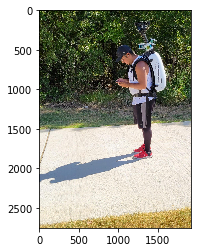

In [ ]:
dataDir='./images'

# initialize the COCO api for instance annotations
coco=COCO('./instances_default.json')
image_id = 13

print(coco.imgs)

image = np.array(Image.open('./images/SSAMFLOONL_101553.jpg'))
plt.imshow(image, interpolation='nearest')
plt.show()

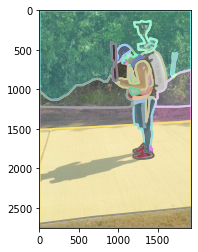

In [ ]:
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


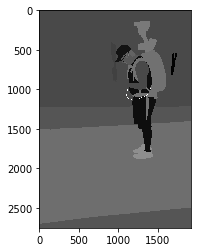

In [ ]:
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
anns_img = np.zeros((img['height'],img['width']))
for ann in anns:
    anns_img = np.maximum(anns_img,coco.annToMask(ann)*ann['category_id'])
print(mask)
plt.imshow(anns_img, interpolation='nearest')